# Sistemas Dinâmicos Aplicados

Aluno: Atílio Leitão Pellegrino

## Apresentação sobre o artigo "Chaos and Phase Synchronization in Ecological Systems"

Autores: BERND BLASIUS e LEWI STONE

Através de um modelo ecológico populacional busca-se explorar fenômenos complexos de sincronização. O modelo descreve um sistema predador-presa-recurso que oscila com evolução de Fase Uniforme e tem níveis de Abundancia Caótica ou Amplitudes (Chaotic Abundance levels or Amplitudes - UPCA).

### Introdução

A sincronização é um fenômeno fundamental que surge em muitos contextos biológicos e físicos para os quais existam dois ou mais sistemas oscilantes acoplados.
É formulado um modelo simples de uma teia alimentar de uma cadia alimentar de três espécies que gera oscilações caóticas coerentes de fase. A coerência de fase garante qque as populações oscilem  em frequência quase constante, que é caracterixada por um pico predominante no espectro de potência. O modelo pertence a classe de osciladores de fase coerente que tem a propriedade de evolução de Fase Uniforme e com ciclo com Amplitudes Caóticas (UPCA).

In [1]:
#Importando pacotes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.integrate
import math

<AxesSubplot:xlabel='Year'>

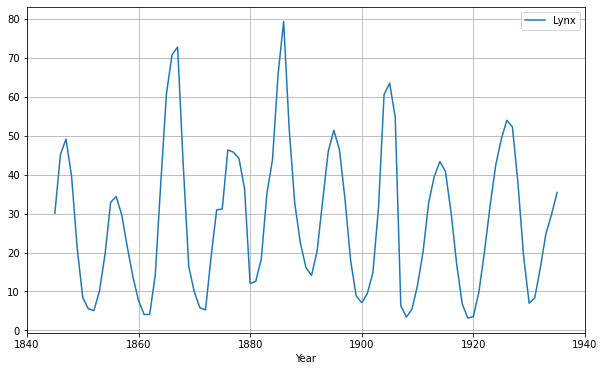

In [2]:
url = 'http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
df = pd.read_csv(url, delim_whitespace=True, header=None, index_col=0)
df.index.name = 'Year'
df.columns = ['Hare','Lynx']
df2 = pd.DataFrame(df['Lynx'])
df2.plot(figsize=(10,6), grid=True, xlim=(1840,1940))

### Modelo UPCA ecológico

Modelo proposto em [Blasius et al., 1999], descreve uma cadeia alimentar "vertical" de três níveis padrão, onde $u$ é a vegetação consumida pelos herbívoros $v$, que são predados pelo predadores $w$. Os coeficientes $a$, $b$ e $c$ são as respectivas tacas de crescimento líquido de cada espécie individual na ausencia de iterações interespecíficas ($\alpha_1 = \alpha_2 = 0$). As funções $f_i(x,y)$ descrevem as interações entre espécies com força $\alpha_i$.

Interações predador-presa e consumidor-recurso, são incorporadas através do termo Lotka-Volterra padrão $f_i(x, y) = xy$ ou do termo Holling type II $f_i(x,y) = \frac{xy}{1+k_i x}$. É também assumida a existencia de um ponto fixo (estável ou instável) $(u^*,v^*,w^*)$ na ausência de interações de espécies.

$\begin{equation}
  \dot{u} = a(u - u^*) - \alpha_1 f_1(u,v) \\
  \dot{v} = - b(v - v^*) + \alpha_1 f_1(u,v) - \alpha_2 f_2(v,w) \\
  \dot{w} = - c(w - w^*) + \alpha_2 f_2(v,w)
\end{equation}$

In [89]:
a = 1
b = 1
c = 10
alpha1 = 0.2
alpha2 = 1
k1 = 0.05
k2 = 0
u_s = 0
v_s = 0
w_s = 0.006

def LotkaVolterra(x,y):
    return (x*y)

def Holling(x,y,k):
    return ((x*y)/(1+k*x))

def model1(t,variaveis):
    u,v,w = variaveis
    #dydt = [a*(u-u_s) - α1*Holling(u,v,k1), -b*(v-v_s) + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    #dydt = [a*u - α1*Holling(u,v,k1), -b*v + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    up = a*u - alpha1*u*v/(1+k1*u)
    vp = -b*v + alpha1*u*v/(1+k1*u) - alpha2*v*w
    wp = -c*(w-w_s) + alpha2*v*w
    return up, vp, wp

variaveis = [9.5, 9, 0.8]
t = np.arange(0,400,0.001)

solution = scipy.integrate.solve_ivp(model1, [0, 400], variaveis, method = "RK45", t_eval  = np.arange(0,400,0.001))


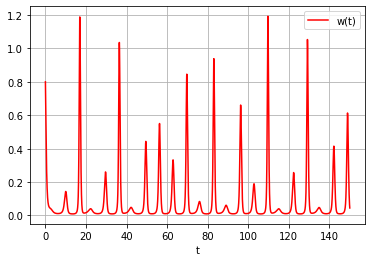

In [90]:
#plt.plot(t, solution.y[0], 'b', label='u(t)')
#plt.plot(t, solution.y[1], 'g', label='v(t)')
plt.plot(t[0:150000], solution.y[2][0:150000], 'r', label='w(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

A série temporal do modelo de teia alimentar também se assemelha ao UPCA encontrado no sistema de Rossler coerente de fase padrão. [Rossler,1976].

$\begin{equation}
  \dot{x} = -(y+z) \\
  \dot{y} = x + 0.2 y \\
  \dot{z} = 0.2 + z(x-\gamma)
\end{equation}$

In [34]:
γ = 5.5

def model2(t,variaveis):
    x,y,z = variaveis
    dydt = [-(y+z), x+0.2*y, 0.2 + z*(x-γ)]
    return dydt

variaveis = [1, 0.18, 0.006]
t2 = np.arange(0,300,0.001)

solution2 = scipy.integrate.solve_ivp(model2, [0, 300], variaveis, method = "RK45", t_eval  = np.arange(0,300,0.001))

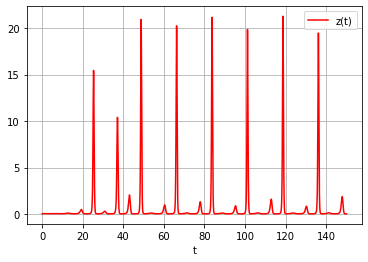

In [35]:
#plt.plot(t2, solution2.y[0], 'b', label='x(t)')
#plt.plot(t2, solution2.y[1], 'g', label='y(t)')
plt.plot(t2[0:150000], solution2.y[2][0:150000], 'r', label='z(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Entretanto a propriedade de UPCA sozinha não é suficiente para descrever completamente a dinâmica observada. Outros fatores são relevantes, como: variabilidade entre os picos e as mudanças na razão pico-vale (peak to trough) do ciclo.
Estimasse que para populações de mamíferos das florestas boreais da América do norte, a razão pico-vale varia de $15-200 \sim 1:13$. O que é um valor próximo ao encontrado para o modelo de teia alimentar ($4-120 \sim 1:30$). Já o modelo de Rössler tem uma razão que varia de $3.7-1770 \sim 1:478$. Mas alterar o parâmetro $\gamma = 5.7$ pode trazer alterações indesejadas, isto é, provacaria alterações na distribuição dos picos, podendo levá-los para regimes ciclícos. 

O ciclos regulares no plano $(u,v)$ indica forte coerência de fase. Pequenas alterações nos parâmetros podem fazer o modelo de teia alimentar entrar em um "regime de funil", que tem uma estrutura de plano de fase consistindo de loops pequenos e grandes e coerência de fase fraca.

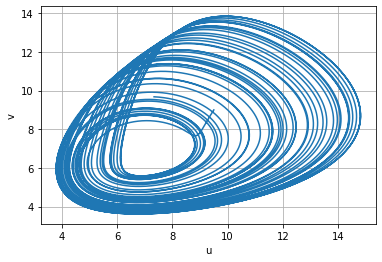

In [91]:
plt.plot(solution.y[0][0:300000], solution.y[1][0:300000])
plt.xlabel('u')
plt.ylabel('v')
plt.grid()
plt.show()

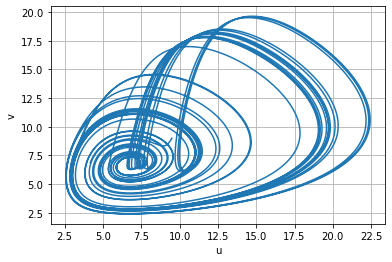

In [94]:
a = 1
b = 1
c = 12
alpha1 = 0.2
alpha2 = 1
k1 = 0.05
k2 = 0
u_s = 0
v_s = 0
w_s = 0.006

def model1(t,variaveis):
    u,v,w = variaveis
    #dydt = [a*(u-u_s) - α1*Holling(u,v,k1), -b*(v-v_s) + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    #dydt = [a*u - α1*Holling(u,v,k1), -b*v + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    up = a*u - alpha1*u*v/(1+k1*u)
    vp = -b*v + alpha1*u*v/(1+k1*u) - alpha2*v*w
    wp = -c*(w-w_s) + alpha2*v*w
    return up, vp, wp

variaveis = [9.5, 9, 0.8]
t4 = np.arange(0,400,0.001)

solution4 = scipy.integrate.solve_ivp(model1, [0, 400], variaveis, method = "RK45", t_eval  = np.arange(0,400,0.001))

plt.plot(solution4.y[0][0:300000], solution4.y[1][0:300000])
plt.xlabel('u')
plt.ylabel('v')
plt.grid()
plt.show()

Os mecanismos que dão origem aos modelos da teia alimentar e de Rössler são quase os mesmo.
Note que tomando $k_i = 0, a = b = 1, c = 10, \alpha_1 = 0.1, \alpha_2 = 0.6, u^* = 1.5, v^* = 0, w^* = 0.01 $, temos

$\begin{equation}
  \dot{y} = x + 0.2 y \hspace{5cm} \dot{u} = u(a-\alpha_1 v)-a u^*\\
  \dot{x} = -y + z \hspace{5.2cm} \dot{v} = -v(b-\alpha_1 u + \alpha_2 w)\\
  \dot{z} = 0.2 + z(x-\gamma) \hspace{3.9cm} \dot{w} = -w(c - \alpha_2 v) + c w^*
 \end{equation}
$ 

In [95]:
A1 = []
T1_aux = []
T1 = []

for i in range(0,len(solution.y[2])-2):
    if (solution.y[2][i] < solution.y[2][i+1]) and  (solution.y[2][i+1] > solution.y[2][i+2]):
        A1.append(solution.y[2][i+1])
        T1_aux.append(t[i+1])
        
for i in range(0,len(T1_aux)-1):
    T1.append(T1_aux[i+1]-T1_aux[i])

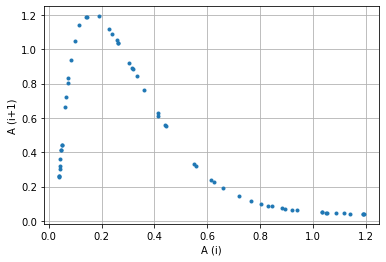

In [96]:
plt.plot(A1[0:-1], A1[1:], '.')
plt.xlabel('A (i)')
plt.ylabel('A (i+1)')
plt.grid()
plt.show()

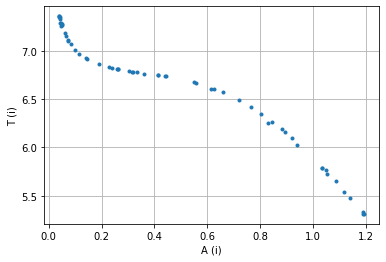

In [97]:
plt.plot(A1[0:-1], T1[0:],'.')
plt.xlabel('A (i)')
plt.ylabel('T (i)')
plt.grid()
plt.show()

In [98]:
A2 = []
T2_aux = []
T2 = []

for i in range(0,len(solution4.y[2])-2):
    if (solution4.y[2][i] < solution4.y[2][i+1]) and  (solution4.y[2][i+1] > solution4.y[2][i+2]):
        A2.append(solution4.y[2][i+1])
        T2_aux.append(t4[i+1])
        
for i in range(0,len(T2_aux)-1):
    T2.append(T2_aux[i+1]-T2_aux[i])

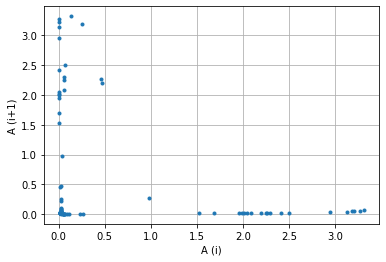

In [99]:
plt.plot(A2[0:-1], A2[1:], '.')
plt.xlabel('A (i)')
plt.ylabel('A (i+1)')
plt.grid()
plt.show()

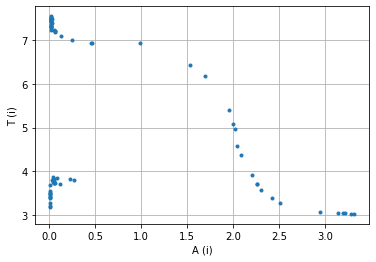

In [100]:
plt.plot(A2[0:-1], T2, '.')
plt.xlabel('A (i)')
plt.ylabel('T (i)')
plt.grid()
plt.show()

In [17]:
a = 1
b = 0.2
c = 10
alpha1 = 0.2
alpha2 = 1
k1 = 0.05
k2 = 0
u_s = 0
v_s = 0
w_s = 0.006

def model1(t, variaveis):
    u,v,w = variaveis
    #dydt = [a*(u-u_s) - α1*Holling(u,v,k1), -b*(v-v_s) + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    #dydt = [a*u - α1*Holling(u,v,k1), -b*v + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    up = a*u - alpha1*u*v/(1+k1*u)
    vp = -b*v + alpha1*u*v/(1+k1*u) - alpha2*v*w
    wp = -c*(w-w_s) + alpha2*v*w
    return up, vp, wp

passo = 0.00025
w_max = np.zeros(4800)
b_pass = np.zeros(4800)
variaveis = [9.5, 9, 0.8]
#variaveis_u = np.zeros([4800,50])
#variaveis_v = np.zeros([4800,50])
variaveis_w = np.zeros([4800,10])

for i in range(0,4800):
    
    solution3 = scipy.integrate.solve_ivp(model1, [0, 500], variaveis, method = "RK45", t_eval  = np.arange(0,500, 0.001))
    
    aux = solution3.y[2]
    #aux = []
    #for j in range(0,len(solution3.y[0])):
    #    if (solution3.y[0][j] > 3.8) and (solution3.y[0][j] < 4.2) and (solution3.y[1][j] > 5.8) and (solution3.y[1][j] < 6.2):
    #        aux.append(solution3.y[2][j])
    aux.sort()
    variaveis_w[i,:] = aux[-10:]
    
    #print(b)
    b_pass[i] = b
    b += passo

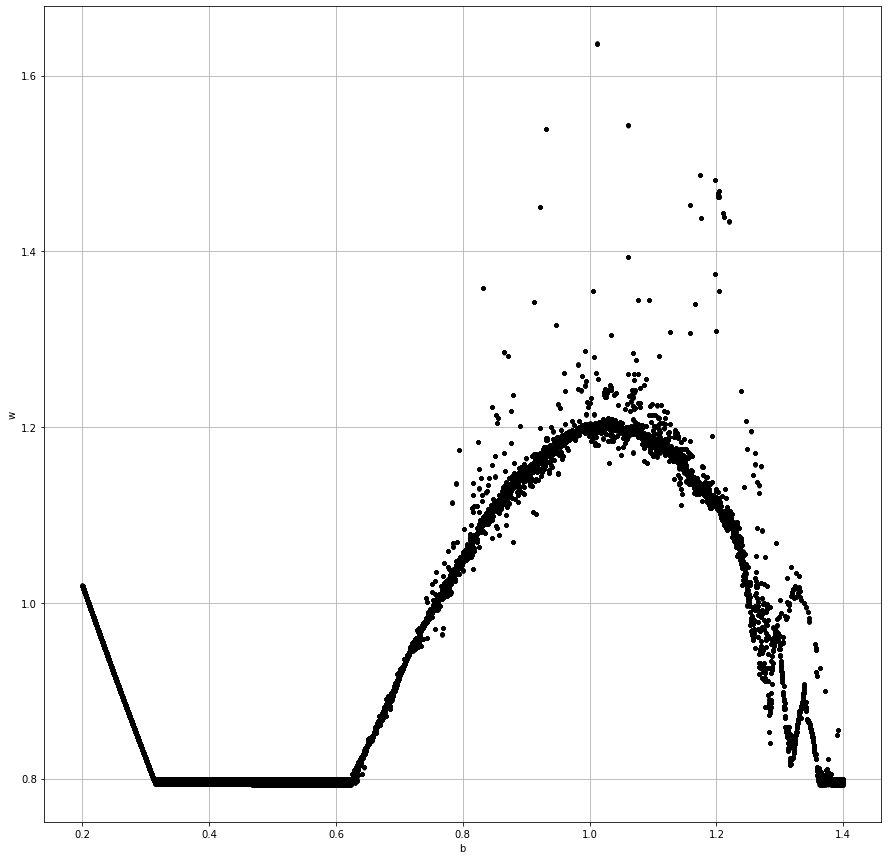

In [18]:
fig = plt.figure()
plt.plot(b_pass, variaveis_w, '.', color = 'black')
plt.xlabel('b')
plt.ylabel('w')
plt.grid()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

### Modelo com dois sitemas acoplados 

O modelo proposto é similar ao caso com apenas um sistema, no entanto, há algumas diferenças: um parâmetro que atua sobre a magnitude migração $\epsilon$, e teremos para dois sistemas acoplados as equações abaixo, com $i \in \{1,2\}$.


$\begin{equation}
  \dot{u_i} = a(u_i - u^*) - \alpha_1 f_1(u_i,v_i) \\
  \dot{v_i} = - b_i(v_i - v^*) + \alpha_1 f_1(u_i,v_i) - \alpha_2 f_2(v_i,w_i) + \epsilon \sum_j (v_j-v_i) \\
  \dot{w_i} = - c(w_i - w^*) + \alpha_2 f_2(v_i,w_i) + \epsilon \sum_j (w_j - w_i)
\end{equation}$

In [29]:
a = 1
b1 = 0.95
b2 = 0.92
c = 12.3
alpha1 = 0.2
alpha2 = 1
epsilon = 0.07
k1 = 0.05
k2 = 0
u_s = 0
v_s = 0
w_s = 0.006

def model2(t,variaveis):
    u1,v1,w1,u2,v2,w2 = variaveis
    #dydt = [a*(u-u_s) - α1*Holling(u,v,k1), -b*(v-v_s) + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    #dydt = [a*u - α1*Holling(u,v,k1), -b*v + α1*Holling(u,v,k1) - α2*LotkaVolterra(v,w), - c*(w-w_s) + α2*LotkaVolterra(v,w)]
    up1 = a*u1 - alpha1*u1*v1/(1+k1*u1)
    vp1 = -b1*v1 + alpha1*u1*v1/(1+k1*u1) - alpha2*v1*w1 + epsilon*(v2-v1)
    wp1 = -c*(w1-w_s) + alpha2*v1*w1 + epsilon*(w2-w1)
    up2 = a*u2 - alpha1*u2*v2/(1+k1*u2)
    vp2 = -b2*v2 + alpha1*u2*v2/(1+k1*u2) - alpha2*v2*w2 + epsilon*(v1-v2)
    wp2 = -c*(w2-w_s) + alpha2*v2*w2 + epsilon*(w1-w2)
    return up1, vp1, wp1, up2, vp2, wp2

variaveis = [9.5, 9, 0.8, 5, 7, 0.9]
t5 = np.arange(0,1000,0.0001)

solution5 = scipy.integrate.solve_ivp(model2, [0, 1000], variaveis, method = "RK45", t_eval = np.arange(0,1000,0.0001))


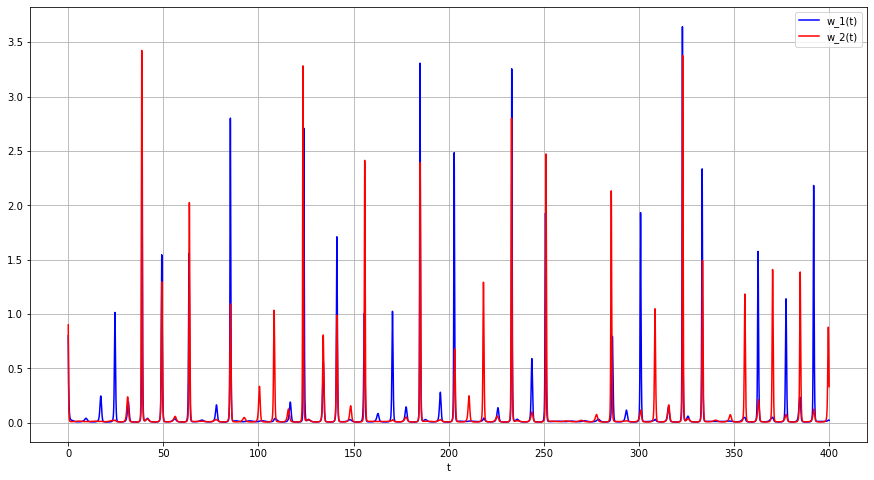

In [30]:
fig = plt.figure()
plt.plot(t5[0:4000000], solution5.y[2][0:4000000], 'b', label='w_1(t)')
plt.plot(t5[0:4000000], solution5.y[5][0:4000000], 'r', label='w_2(t)')
plt.legend(loc='best')
plt.xlabel('t')
fig.set_figheight(8)
fig.set_figwidth(15)
plt.grid()
plt.show()

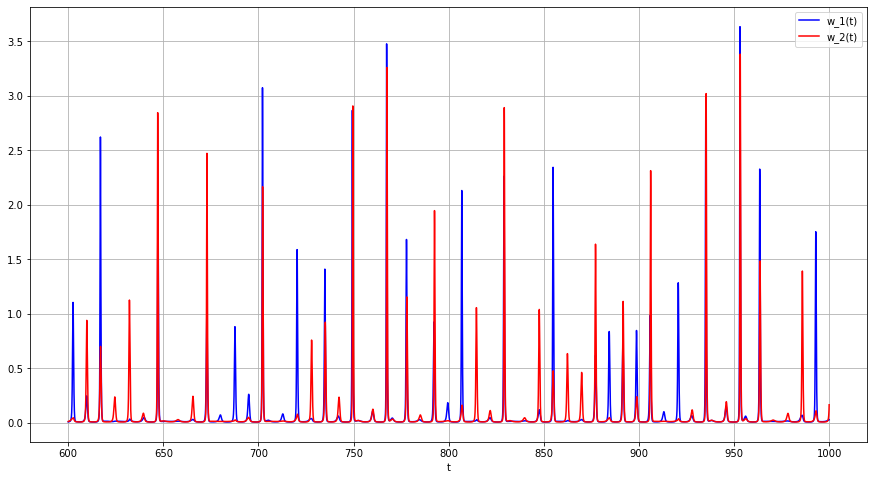

In [31]:
fig = plt.figure()
plt.plot(t5[-4000000:], solution5.y[2][-4000000:], 'b', label='w_1(t)')
plt.plot(t5[-4000000:], solution5.y[5][-4000000:], 'r', label='w_2(t)')
plt.legend(loc='best')
plt.xlabel('t')
fig.set_figheight(8)
fig.set_figwidth(15)
plt.grid()
plt.show()

### Referências

[1] Blasius, Bernd & Stone, Lewi. (2000). Chaos and phase synchronization in ecological systems. International Journal of Bifurcation and Chaos - IJBC. 10. 10.1142/S0218127400001511. http://dx.doi.org/10.1142/S0218127400001511

[2] Jeffrey Kantor, "2.5 - Hare and Lynx Population Dynamics" https://jckantor.github.io/CBE30338/02.05-Hare-and-Lynx-Population-Dynamics.html

[3] Wu, GC., Baleanu, D. Discrete fractional logistic map and its chaos. Nonlinear Dyn 75, 283–287 (2014). https://doi.org/10.1007/s11071-013-1065-7

### Bifucação Mapa Logístico Fracionário Discreto [3]

In [22]:
v = 0.6
x_0 = 0.3
n = 100
μ = 1

data_mu = np.linspace(1,2.5,3500)
data_x100 = np.zeros([len(data_mu),40])

for k in range(0,len(data_mu)):
    data = np.zeros(n+1)
    Γ_v = math.gamma(v)
    data[0] = x_0

    for i in range(1,len(data)):
        aux = 0
        for j in range(1,i+1):
            aux += math.gamma(i-j+v)/math.gamma(i-j+1)*data[j-1]*(1-data[j-1]) 
        data[i] = x_0 + data_mu[k]/Γ_v * aux


    for i in range(0,40):
        data_x100[k,i] = data[60+i]

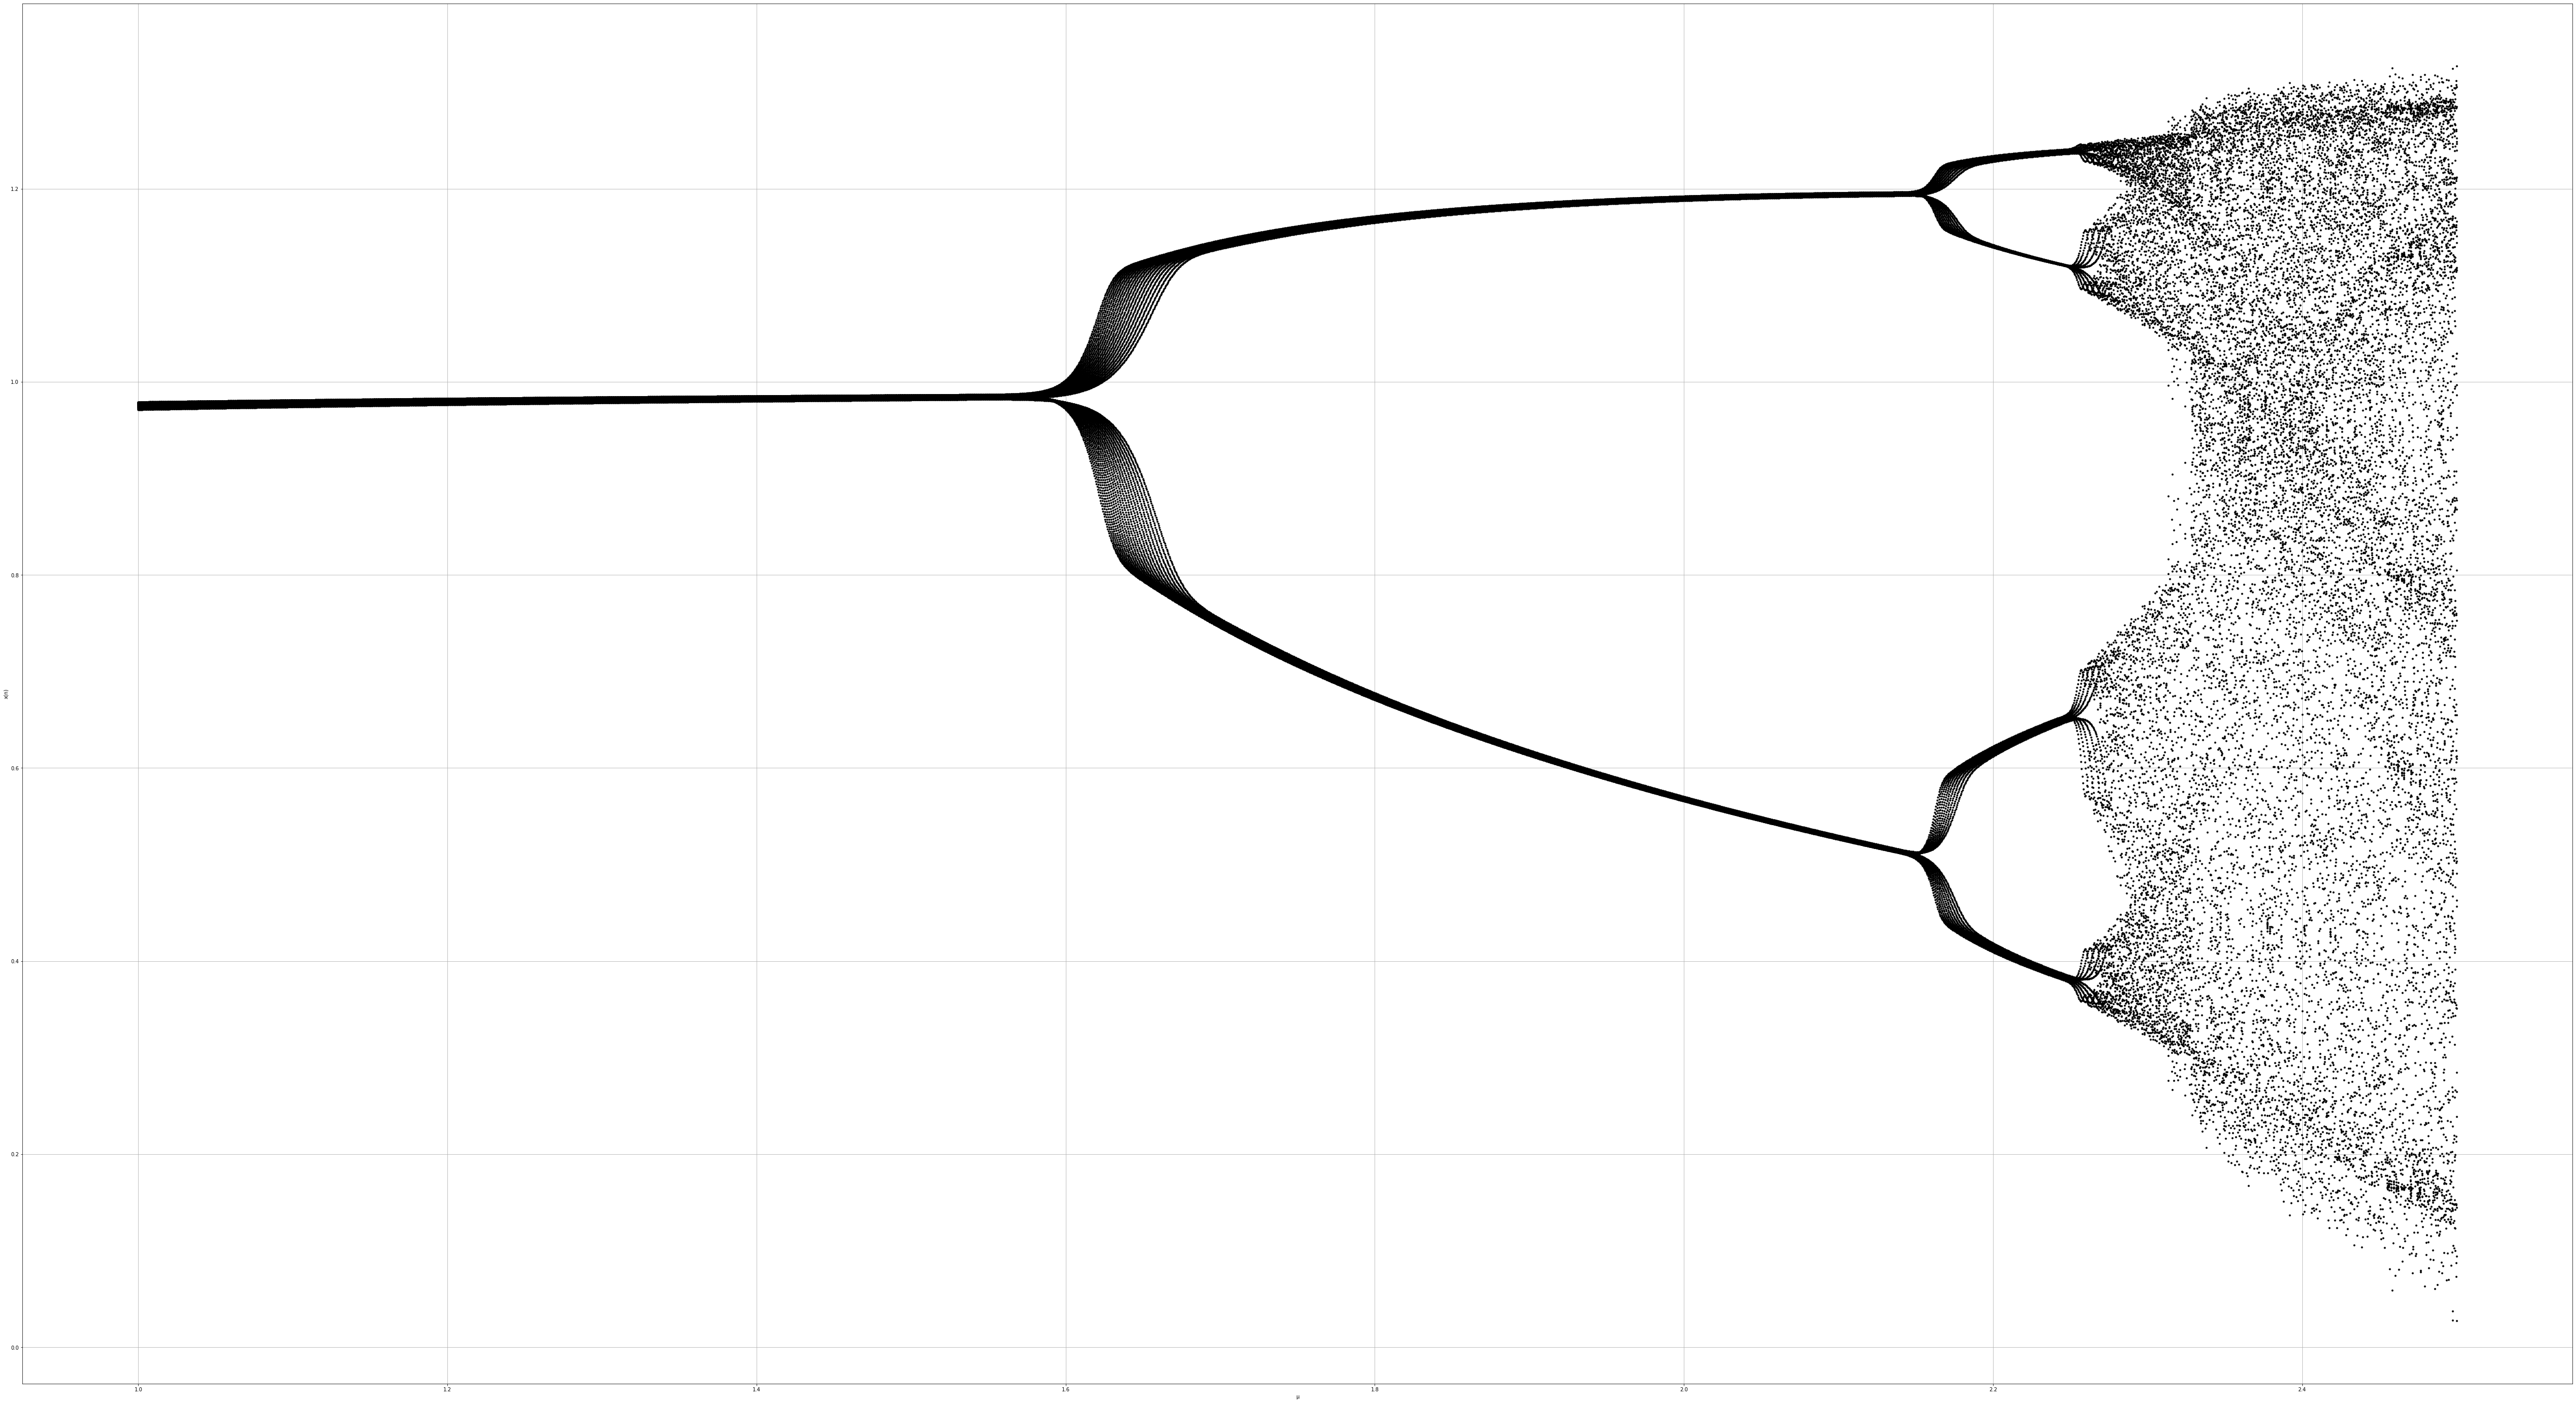

In [23]:
fig = plt.figure()
plt.plot(data_mu, data_x100, '.', color = 'black')
plt.xlabel('μ')
plt.ylabel('x(n)')
plt.grid()
fig.set_figheight(50)
fig.set_figwidth(90)
plt.show()

In [24]:
v = 0.2
x_0 = 0.3
n = 100
μ = 1

data_mu2 = np.linspace(1,2.5,3500)
data_x1002 = np.zeros([len(data_mu),40])

for k in range(0,len(data_mu)):
    data = np.zeros(n+1)
    Γ_v = math.gamma(v)
    data[0] = x_0

    for i in range(1,len(data)):
        aux = 0
        for j in range(1,i+1):
            aux += math.gamma(i-j+v)/math.gamma(i-j+1)*data[j-1]*(1-data[j-1]) 
        data[i] = x_0 + data_mu2[k]/Γ_v * aux


    for i in range(0,40):
        data_x1002[k,i] = data[60+i]

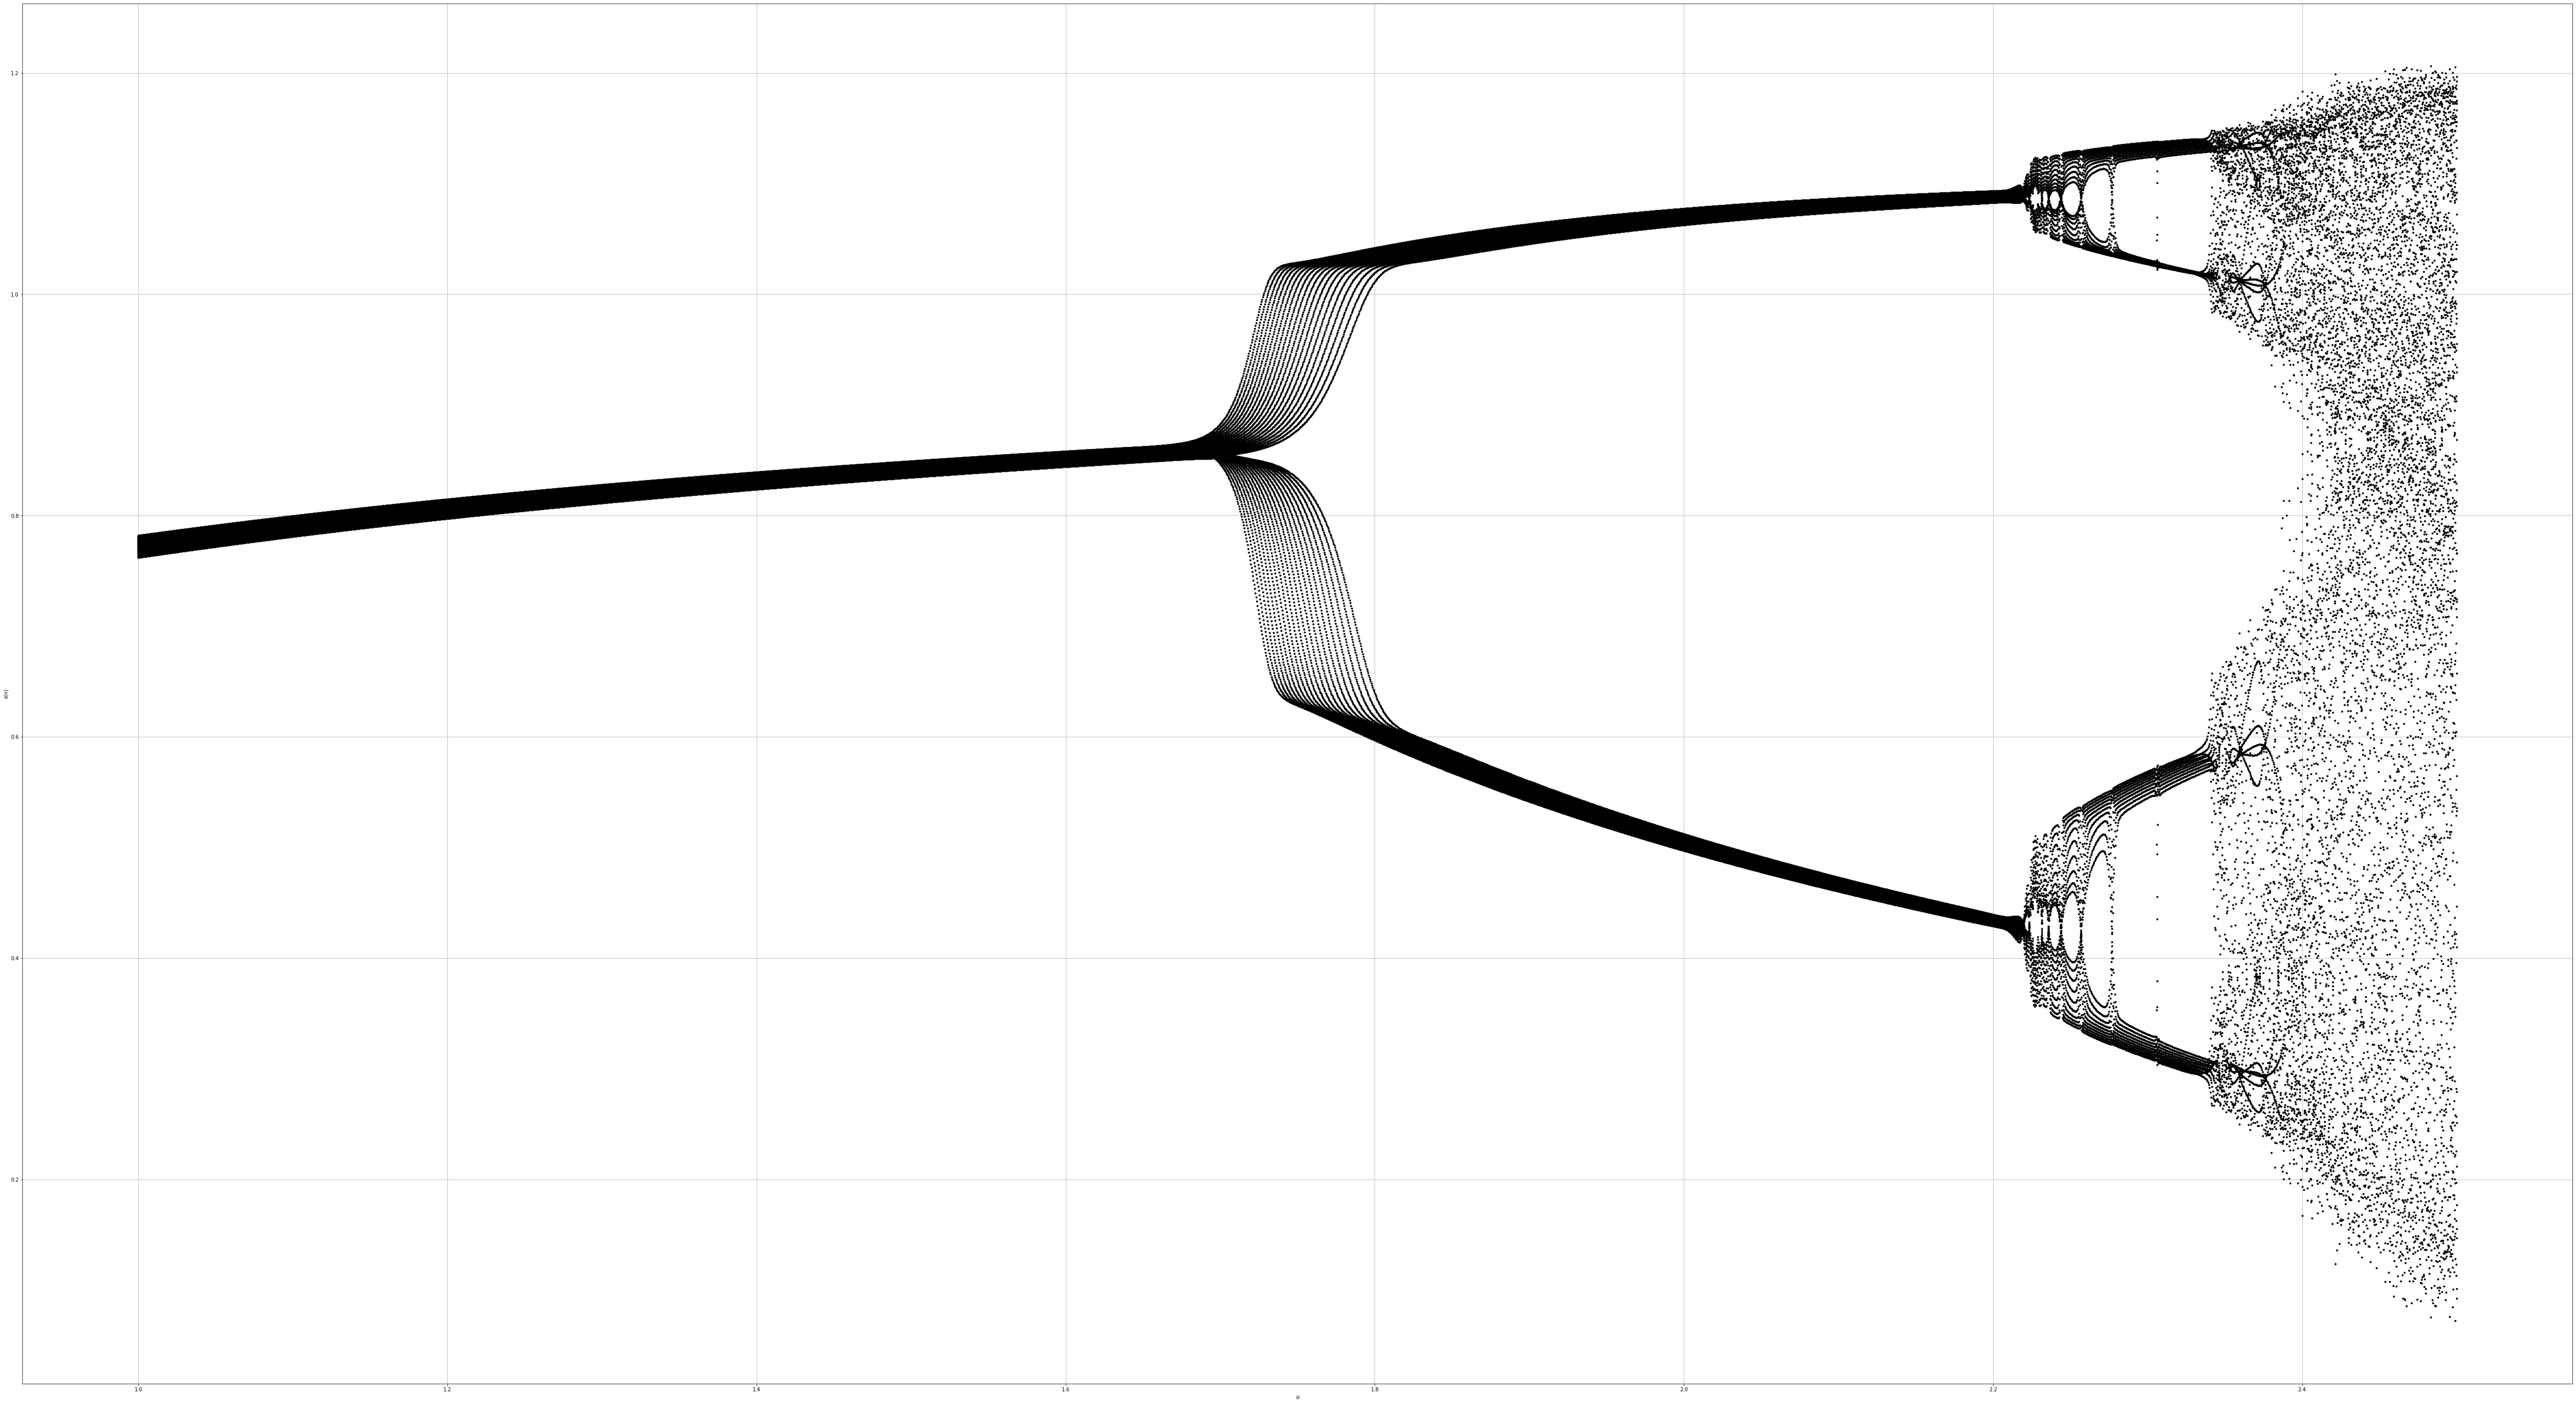

In [25]:
fig = plt.figure()
plt.plot(data_mu2, data_x1002, '.', color = 'black')
plt.xlabel('μ')
plt.ylabel('x(n)')
plt.grid()
fig.set_figheight(50)
fig.set_figwidth(90)
plt.show()